In [ ]:
import os
!pip install tensorflow-addons
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("/content/Training_sett.csv")
test_data = pd.read_csv("/content/Testing_set.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

train_dir = '/content/drive/My Drive/trainn'
test_dir = '/content/drive/My Drive/test'

train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print(f'Number of training files: {len(train_files)}')
print(f'Number of testing files: {len(test_files)}')

Number of training files: 6000
Number of testing files: 5420


In [ ]:
train_data

,filename,label
0,Image_1.jpg,eating
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
5996,Image_5997.jpg,calling
5997,Image_5998.jpg,texting
5998,Image_5999.jpg,listening_to_music
5999,Image_6000.jpg,sleeping


In [ ]:
test_data

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
5395,Image_5396.jpg
5396,Image_5397.jpg
5397,Image_5398.jpg
5398,Image_5399.jpg


In [ ]:
train_data.label.value_counts()

label
laughing              429
cycling               418
calling               413
sitting               413
clapping              407
hugging               406
using_laptop          405
sleeping              401
fighting              400
eating                399
drinking              397
texting               386
dancing               380
running               377
listening_to_music    370
Name: count, dtype: int64

In [ ]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [ ]:
filename = train_data['filename']
situation = train_data['label']

In [ ]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "/content/drive/MyDrive/trainn/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

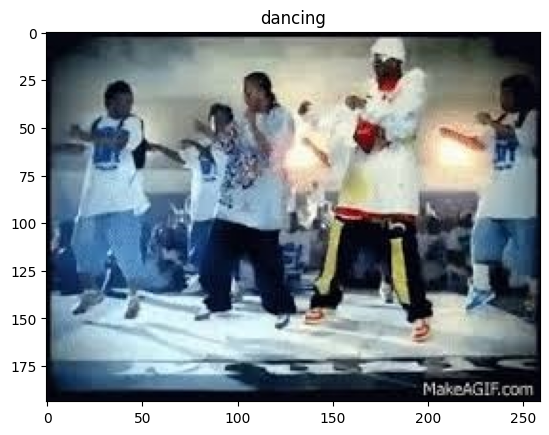

In [ ]:
displaying_random_images()

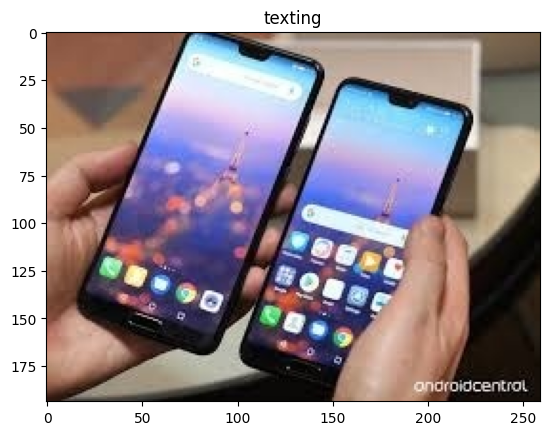

In [ ]:
displaying_random_images()

In [ ]:
import numpy as np
from PIL import Image
train_dir = '/content/drive/My Drive/trainn'
img_data = []
img_label = []
for i in range(len(train_files)):
    try:
        t = os.path.join(train_dir, train_files[i])
        print(f'Processing file: {t}')
        temp_img = Image.open(t)
        resized_img = temp_img.resize((160,160))
        img_array = np.asarray(resized_img)
        print(f'Image shape: {img_array.shape}')
        img_data.append(img_array)
        img_label.append(situation[i])
    except Exception as e:
        print(f'Error processing file {train_files[i]}: {e}')
iii = np.asarray(img_data)
y_train = np.asarray(img_label)

print(f'Type of input data (iii): {type(iii)}')
print(f'Shape of input data (iii): {iii.shape}')
print(f'Shape of target data (y_train): {y_train.shape}')

Streaming output truncated to the last 5000 lines.
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_325.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3252.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3247.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3250.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3249.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3259.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3261.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3255.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3262.jpg
Image shape: (160, 160, 3)
Processing file: /content/drive/My Drive/trainn/Image_3258.jpg
Image shape: (160, 160, 3)
Processing file: /conte

In [ ]:
print(f'Shape of input data (iii): {iii.shape}')
print(f'Shape of target data (y_train): {y_train.shape}')

Shape of input data (iii): (6000, 160, 160, 3)
Shape of target data (y_train): (6000,)


In [ ]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])
print(f'Shape of target data (y_train): {y_train.shape}')

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of target data (y_train): (6001, 15)


In [ ]:

if len(iii) != len(y_train):
    print("Mismatch detected!")
for i in range(min(len(iii), len(y_train))):
    if iii[i] is None or y_train[i] is None:
        print(f'Missing data at index {i}')
cleaned_iii = []
cleaned_y_train = []

for i in range(min(len(iii), len(y_train))):
    if iii[i] is not None and y_train[i] is not None:
        cleaned_iii.append(iii[i])
        cleaned_y_train.append(y_train[i])
iii = np.array(cleaned_iii)
y_train = np.array(cleaned_y_train)

print(f'Number of samples after cleaning: {len(iii)}')

Mismatch detected!
Number of samples after cleaning: 6000


In [ ]:

efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 [==============================] - 3s 0us/step


In [ ]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 1318927 (5.03 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [ ]:
history = efficientnet_model.fit(iii,y_train,epochs=10)

Epoch 1/10
188/188 [==============================] - 1841s 10s/step - loss: 2.7615 - accuracy: 0.0742
Epoch 2/10
188/188 [==============================] - 1747s 9s/step - loss: 2.5602 - accuracy: 0.1765
Epoch 3/10
188/188 [==============================] - 1738s 9s/step - loss: 2.2714 - accuracy: 0.2868
Epoch 4/10
188/188 [==============================] - 1744s 9s/step - loss: 1.8830 - accuracy: 0.4298
Epoch 5/10
188/188 [==============================] - 1774s 9s/step - loss: 1.4572 - accuracy: 0.5720
Epoch 6/10
188/188 [==============================] - 1892s 10s/step - loss: 1.0848 - accuracy: 0.7108
Epoch 7/10
188/188 [==============================] - 1707s 9s/step - loss: 0.7876 - accuracy: 0.8000
Epoch 8/10
188/188 [==============================] - 1708s 9s/step - loss: 0.5681 - accuracy: 0.8698
Epoch 9/10
188/188 [==============================] - 1698s 9s/step - loss: 0.4124 - accuracy: 0.9120
Epoch 10/10
188/188 [==============================] - 1749s 9s/step - loss: 0.3

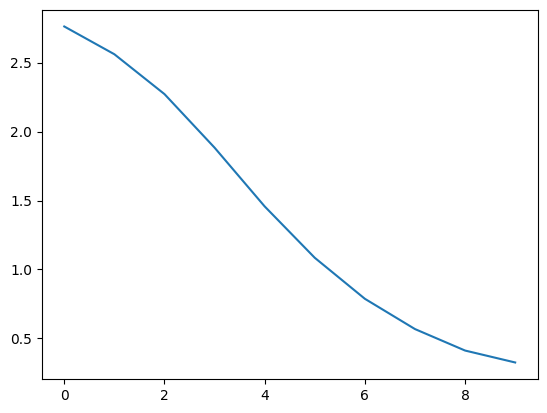

In [ ]:
losses = history.history["loss"]
plt.plot(losses)

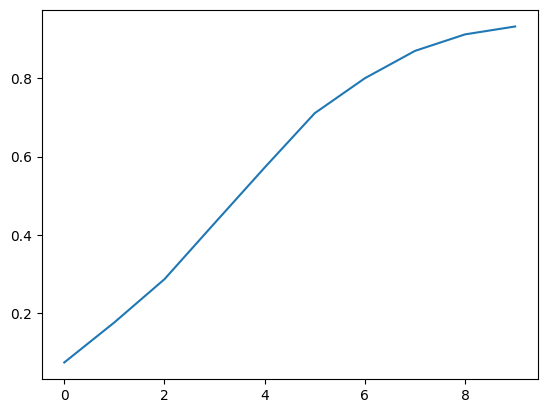

In [ ]:
acc = history.history['accuracy']
plt.plot(acc)

In [ ]:

def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [ ]:
def test_predict(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 0s 302ms/step
probability: 64.95558619499207%
Predicted class :  4


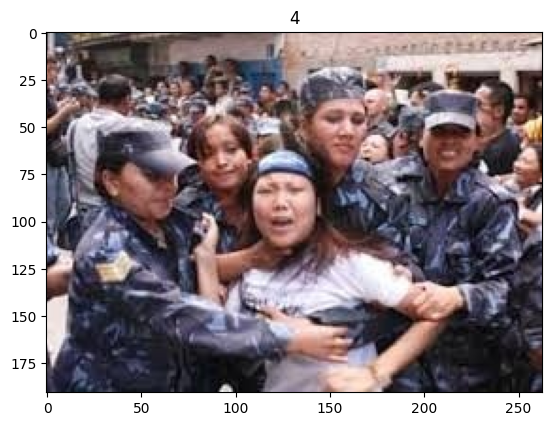

In [ ]:
test_predict("/content/drive/My Drive/test/Image_111.jpg")